<br>
<br>
<br>
<br>

# Complete Case Analysis:

<br>
<br>
<br>

In [15]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("dataset/data_science_job.csv")

df.head(5)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


In [5]:
df.isnull().mean() * 100  # percentange of data missing:

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [9]:
# _____ we apply on _____ : 
# city_development_index
# enrolled_university
# education_level
# experience
# training_hours

col = [var for var in df.columns if df[var].isnull().mean()< 0.05 and df[var].isnull().mean()>0]

col 


['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [10]:
# if we delete all the row then how % data will we have:

len(df[col].dropna()) / len(df[col]) * 100


89.68577095730244

In [13]:
new_df = df[col].dropna()

new_df.isnull().sum()


city_development_index    0
enrolled_university       0
education_level           0
experience                0
training_hours            0
dtype: int64

<br>
<br>

## Now,check the distribution, is almost same or not before and after appling `CCA`

<br>
<br>

In [14]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17182 entries, 0 to 19157
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  17182 non-null  float64
 1   enrolled_university     17182 non-null  object 
 2   education_level         17182 non-null  object 
 3   experience              17182 non-null  float64
 4   training_hours          17182 non-null  float64
dtypes: float64(3), object(2)
memory usage: 805.4+ KB


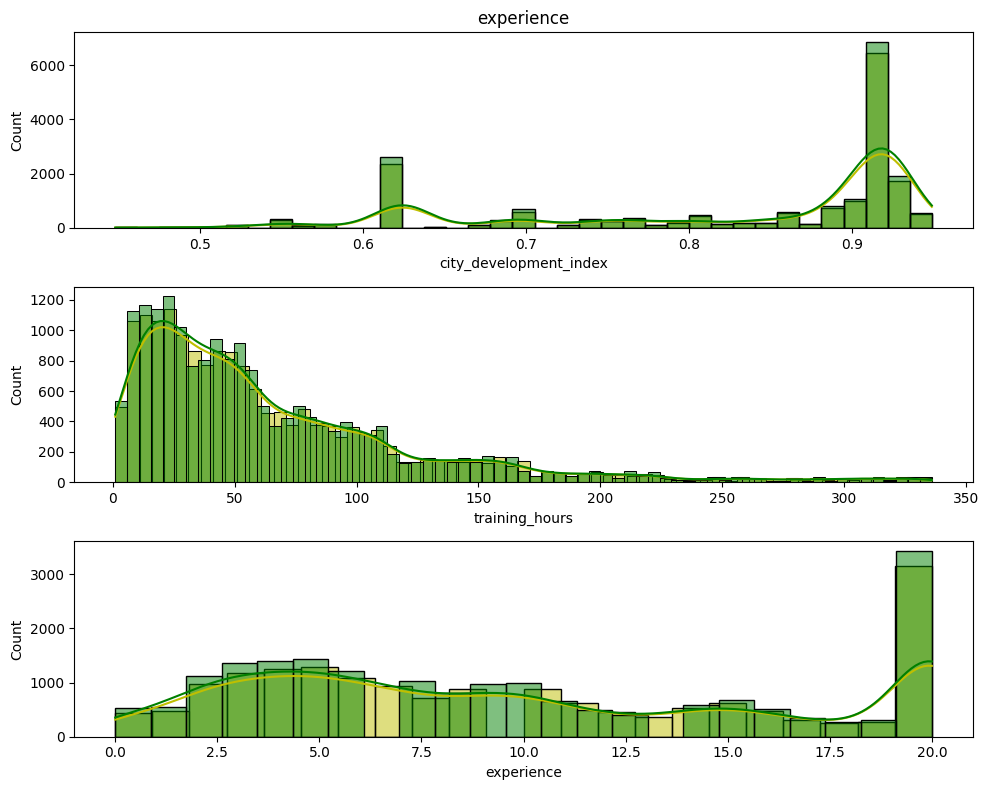

In [31]:
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(10,8))

sns.histplot(new_df["city_development_index"],kde=True,color='y',ax=ax[0])
sns.histplot(data=df,x="city_development_index",kde=True,color='green',ax=ax[0])
ax[0].set_title("city_development_index")


sns.histplot(new_df["training_hours"],kde=True,color='y',ax=ax[1])
sns.histplot(data=df,x="training_hours",kde=True,color='green',ax=ax[1])
ax[0].set_title("training_hours")


sns.histplot(new_df["experience"],kde=True,color='y',ax=ax[2])
sns.histplot(data=df,x="experience",kde=True,color='green',ax=ax[2])
ax[0].set_title("experience")

fig.tight_layout()

# for numerical value distribution are almost same:



<br>
<br>
<br>

# Now, for categorical data: (see the percentange of unique category almost same)

<br>
<br>




In [53]:
temp = pd.concat(
    [
        
        df["enrolled_university"].value_counts()/len(df),
        
        new_df["enrolled_university"].value_counts()/len(new_df)
    ],axis=1
)

temp.columns = ["orginal" , "cca"]

temp 

,orginal,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [54]:
temp = pd.concat(
    [
        
        df["education_level"].value_counts()/len(df),
        
        new_df["education_level"].value_counts()/len(new_df)
    ],axis=1
)

temp.columns = ["orginal" , "cca"]

temp 

,orginal,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
